In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [20]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [21]:
y_train[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [22]:
#one-dimensional array
y_test=y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [23]:
#examine data
img_classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
def plot_sample(x,y,index):
    plt.figure(figsize=(12,4))
    plt.imshow(x[index])
    plt.xlabel(img_classes[y[index]])

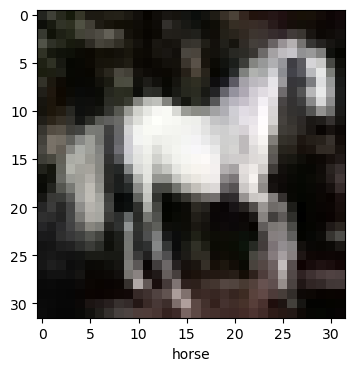

In [25]:
plot_sample(x_test,y_test,13)

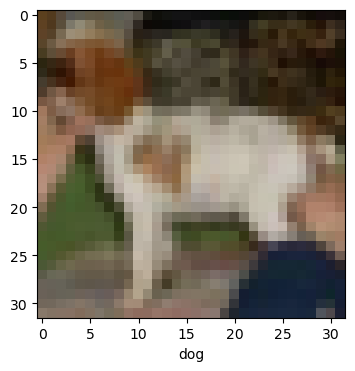

In [26]:
plot_sample(x_test,y_test,12)

In [27]:
#normalization
x_train=x_train/255
x_test=x_test/255

In [28]:
#CNN
deep_lrng_model=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [31]:
deep_lrng_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [32]:
deep_lrng_model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.4396 - accuracy: 0.4834
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.0867 - accuracy: 0.6203
Epoch 3/5
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9514 - accuracy: 0.6692
Epoch 4/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8743 - accuracy: 0.6950
Epoch 5/5
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8063 - accuracy: 0.7205


In [33]:
deep_lrng_model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9171 - accuracy: 0.6853


[0.9171263575553894, 0.6852999925613403]

In [34]:
y_pred=deep_lrng_model.predict(x_test)
y_pred[:5]

313/313 [==============================] - 3s 8ms/step


array([[3.08854808e-03, 3.42238898e-04, 3.43476492e-03, 6.31326318e-01,
        2.94542726e-04, 3.31142634e-01, 1.05406595e-02, 2.68500244e-05,
        1.96345728e-02, 1.68787068e-04],
       [1.34184649e-02, 1.05163455e-01, 2.03221862e-04, 1.09570128e-05,
        3.37605161e-06, 2.00138174e-06, 1.39873350e-06, 3.12319798e-06,
        8.79756510e-01, 1.43737555e-03],
       [1.73780933e-01, 6.89898878e-02, 4.71146544e-03, 1.55325048e-03,
        5.51916950e-04, 3.33629490e-04, 1.21455727e-04, 2.36653793e-03,
        7.35103369e-01, 1.24874990e-02],
       [6.54846966e-01, 6.34362400e-02, 7.73385391e-02, 3.06711067e-03,
        4.32307180e-03, 8.09283345e-04, 2.96254572e-03, 9.95990558e-05,
        1.92686796e-01, 4.29796492e-04],
       [2.18619771e-05, 5.87871800e-05, 1.42493686e-02, 3.84214707e-02,
        2.91781753e-01, 2.30127163e-02, 6.32350683e-01, 5.54943326e-05,
        4.71537860e-05, 6.59520140e-07]], dtype=float32)

In [35]:
y_pred_class=[np.argmax(element) for element in y_pred]
y_pred_class[:5]

[3, 8, 8, 0, 6]

In [36]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

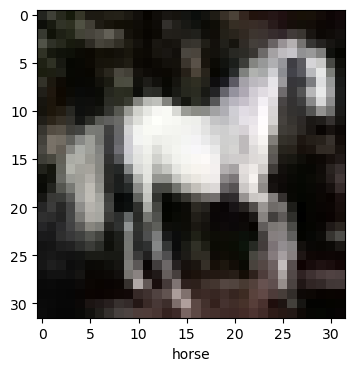

In [39]:
plot_sample(x_test,y_test,13)

In [40]:
img_classes[y_pred_class[13]]

'horse'

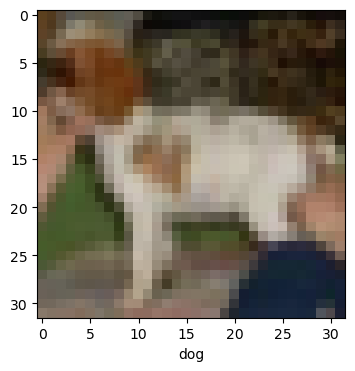

In [41]:
plot_sample(x_test,y_test,12)

In [42]:
img_classes[y_pred_class[12]]

'dog'